In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
from sklearn import tree


file = open("data_cleaned.csv", "r")
df = pd.read_csv(file, sep = ",")

df.head()

,team_one_win,duration,team_one_barons,team_two_barons,team_one_dragons,team_two_dragons,team_one_rift_heralds,team_two_rift_heralds,team_one_first_baron,team_one_first_blood,...,"team_two_mid_champ_(139.0, 144.0]","team_two_mid_champ_(144.0, 148.0]","team_two_mid_champ_(148.0, 149.0]","team_two_bot_champ_(-0.001, 98.0]","team_two_bot_champ_(98.0, 109.0]","team_two_bot_champ_(109.0, 117.0]","team_two_bot_champ_(117.0, 123.0]","team_two_bot_champ_(123.0, 128.0]","team_two_bot_champ_(128.0, 132.0]","team_two_bot_champ_(132.0, 133.0]"
0,0,0.758468,0,2,2,4,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.531370,0,1,4,1,2,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.387923,0,0,3,0,2,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.303682,0,0,2,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.476289,0,1,1,3,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [2]:
features = df.loc[:, df.columns != 'team_one_win']
features.describe()

,duration,team_one_barons,team_two_barons,team_one_dragons,team_two_dragons,team_one_rift_heralds,team_two_rift_heralds,team_one_first_baron,team_one_first_blood,team_one_first_dragon,...,"team_two_mid_champ_(139.0, 144.0]","team_two_mid_champ_(144.0, 148.0]","team_two_mid_champ_(148.0, 149.0]","team_two_bot_champ_(-0.001, 98.0]","team_two_bot_champ_(98.0, 109.0]","team_two_bot_champ_(109.0, 117.0]","team_two_bot_champ_(117.0, 123.0]","team_two_bot_champ_(123.0, 128.0]","team_two_bot_champ_(128.0, 132.0]","team_two_bot_champ_(132.0, 133.0]"
count,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,...,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000
mean,0.445773,0.448652,0.493812,1.910745,2.010655,0.718466,0.643800,0.332432,0.501598,0.467011,...,0.127449,0.143267,0.138431,0.149496,0.142283,0.142939,0.140398,0.153676,0.173264,0.097943
std,0.126780,0.635435,0.667377,1.375184,1.399784,0.726655,0.711956,0.471104,0.500018,0.498931,...,0.333488,0.350359,0.345366,0.356591,0.349355,0.350025,0.347414,0.360653,0.378491,0.297249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.365832,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.443594,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.525479,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,4.000000,7.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
X = features
y = df['team_one_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #30% test

clf = RandomForestClassifier(n_estimators=100,  random_state=0, n_jobs=-1) #create gaussian classifier, number of trees is currently arbitrary
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9669489210598197


In [4]:
clf.feature_names = X_train.columns.values
#print(clf.feature_names)

clf.class_names = y_pred
#print(clf.class_names)

clf.estimators_ #provides the different trees modelled.
len(clf.estimators_) #100 trees confirmed.


100

 Text(608.7033070866141, 243.18947368421055, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(612.9212598425197, 243.18947368421055, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(622.9388976377953, 271.8, 'X[93] <= 0.5\ngini = 0.044\nsamples = 183\nvalue = [302, 7]'),
 Text(617.1392125984252, 243.18947368421055, 'X[23] <= 0.627\ngini = 0.033\nsamples = 176\nvalue = [293, 5]'),
 Text(611.8667716535433, 214.57894736842104, 'X[31] <= 0.539\ngini = 0.014\nsamples = 170\nvalue = [285, 2]'),
 Text(607.6488188976379, 185.96842105263158, 'X[17] <= 0.386\ngini = 0.007\nsamples = 166\nvalue = [281, 1]'),
 Text(605.5398425196851, 157.35789473684213, 'gini = 0.0\nsamples = 136\nvalue = [224, 0]'),
 Text(609.7577952755905, 157.35789473684213, 'X[24] <= 0.451\ngini = 0.034\nsamples = 30\nvalue = [57, 1]'),
 Text(607.6488188976379, 128.7473684210526, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(611.8667716535433, 128.7473684210526, 'gini = 0.0\nsamples = 29\nvalue = [57, 0]'),
 Text(616.084

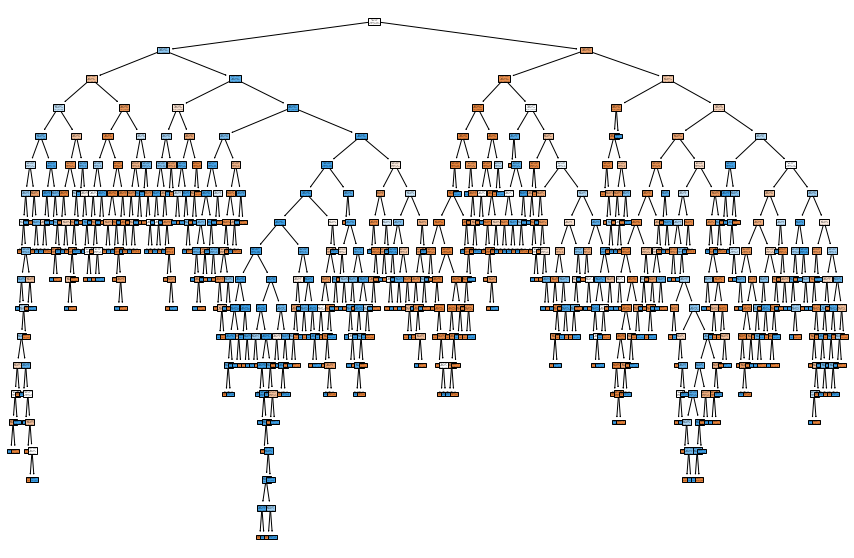

In [5]:
#visualizing a decision tree

estimator = clf.estimators_[2] #picking a tree, arbitrarily the third one 

plt.figure(figsize = (15,10))
tree.plot_tree(estimator, filled = True)




In [6]:
#Visualizing feature importance distribution

for feature in zip(features, clf.feature_importances_):
    print(feature) #printing name and gini importance of each feature 

    
feature_names = features.columns.tolist() #column names only in a list
gini_imp = clf.feature_importances_.tolist() #gini importances only in a list

print(feature_names[1]) #this confirms that these lists are in proper paired order
print(gini_imp[1])

('duration', 0.006222609336890673)
('team_one_barons', 0.026714767339013692)
('team_two_barons', 0.030420362611798587)
('team_one_dragons', 0.027029598619437364)
('team_two_dragons', 0.038835428968914364)
('team_one_rift_heralds', 0.001392480712993281)
('team_two_rift_heralds', 0.003131381383344639)
('team_one_first_baron', 0.015659593732147488)
('team_one_first_blood', 0.0006763636682020141)
('team_one_first_dragon', 0.00169563916432862)
('team_one_first_inhibitor', 0.06945064111709277)
('team_one_first_rift_herald', 0.0009467931219761919)
('team_one_first_tower', 0.01254434575203052)
('team_one_assists', 0.036732606693456446)
('team_two_assists', 0.024185321538216967)
('team_one_level', 0.015649951959679692)
('team_two_level', 0.017360549458445333)
('team_one_kills', 0.04376454360449496)
('team_two_kills', 0.05900989798017341)
('team_one_obj_damage', 0.07388717298358558)
('team_two_obj_damage', 0.10056849590852084)
('team_one_deaths', 0.04820126034829486)
('team_two_deaths', 0.031701

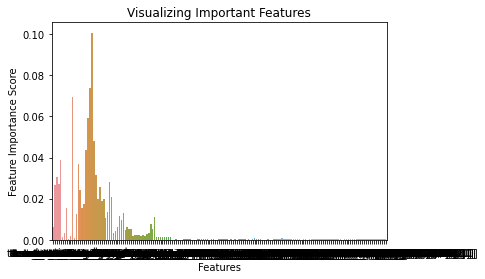

In [7]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_names, y=gini_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()
#we can see that there are a few features that are significantly more valuable than the majority



In [10]:
#identifying valuable features. With 95 features, anything over 1/95 ~ 1% could be said to be better than average, but I will select only those with importance over 0.02 arbitrarily to confirm if we return top 3 features.
sfm = SelectFromModel(clf, threshold=0.04)
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(feature_names[feature_list_index])


team_one_first_inhibitor
team_one_kills
team_two_kills
team_one_obj_damage
team_two_obj_damage
team_one_deaths


In [29]:
#performing a model with only our selected features

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

y_pred = clf.predict(X_test)
print("Full Feature Accuracy: " , metrics.accuracy_score(y_test, y_pred))

y_important_pred = clf_important.predict(X_important_test)
print(" Top Feature Accuracy: " , metrics.accuracy_score(y_test, y_important_pred))

#with a 96% decrease in features, the model's accuracy is still within 2% of each other


Full Feature Accuracy:  0.9669489210598197
 Top Feature Accuracy:  0.9543840480742967
